In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from loguru import logger
import numpy as np
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [16]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811.csv"
)

df_exo = pd.read_csv(file_path)

df_fake = pd.read_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250813_plus_famous_fakes.csv"
)
df_exo = pd.concat([df_exo, df_fake], ignore_index=True)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic' '55 Cncx' 'GJ 876x'
 'HD 110067x' 'HD 191939x' 'KOI-351x' 'TOI-942x' 'TOI-942xx' 'TOI-942xxx'
 'TRAPPIST-1x' 'SSE' 'SSEn' 'K2-290l' 'Kepler-462l']
31
sy_pnum
2    15
3     3
4     3
5     2
6     3
7     1
8     4
Name: hostname, dtype: int64


In [17]:
df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp_plus_lambda.csv"
)

2025-08-14 20:51:27.780 | INFO     | exonamd.run:interp_db:170 - Thinning down the data with nanmedian
2025-08-14 20:51:27.785 | WARNING  | exonamd.run:interp_db:173 - NaT values in rowupdate: 87
2025-08-14 20:51:27.802 | INFO     | exonamd.run:interp_db:182 - Data thinned down
2025-08-14 20:51:27.803 | INFO     | exonamd.run:interp_db:184 - Checking for duplicates
2025-08-14 20:51:27.806 | INFO     | exonamd.run:interp_db:192 - No duplicates found
2025-08-14 20:51:27.807 | INFO     | exonamd.run:interp_db:194 - Instantiating the flags
2025-08-14 20:51:27.808 | INFO     | exonamd.run:interp_db:196 - Flags instantiated
2025-08-14 20:51:27.809 | INFO     | exonamd.run:interp_db:198 - Interpolating missing eccentricity values


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

2025-08-14 20:51:27.866 | INFO     | exonamd.run:interp_db:207 - Values interpolated
2025-08-14 20:51:27.867 | INFO     | exonamd.run:interp_db:209 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

2025-08-14 20:51:29.298 | INFO     | exonamd.run:interp_db:218 - Values interpolated
2025-08-14 20:51:29.301 | DEBUG    | exonamd.run:interp_db:220 - Dropping columns that are no longer needed
2025-08-14 20:51:29.303 | DEBUG    | exonamd.run:interp_db:222 - Columns dropped
2025-08-14 20:51:29.304 | INFO     | exonamd.run:interp_db:224 - Removing systems where at least one planet has no mass or semi-major axis
2025-08-14 20:51:29.321 | INFO     | exonamd.run:interp_db:233 - Removing 1 systems: ['KOI-351x']
2025-08-14 20:51:29.323 | INFO     | exonamd.run:interp_db:235 - Systems removed
2025-08-14 20:51:29.324 | INFO     | exonamd.run:interp_db:237 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-08-14 20:51:29.532 | INFO     | exonamd.run:interp_db:246 - Values interpolated
2025-08-14 20:51:29.534 | INFO     | exonamd.run:interp_db:248 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-08-14 20:51:29.584 | INFO     | exonamd.run:interp_db:256 - Values interpolated
2025-08-14 20:51:29.586 | INFO     | exonamd.run:interp_db:259 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-08-14 20:51:29.764 | INFO     | exonamd.run:interp_db:267 - Values computed
2025-08-14 20:51:29.766 | INFO     | exonamd.run:interp_db:269 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

2025-08-14 20:51:29.982 | INFO     | exonamd.run:interp_db:278 - Values interpolated
2025-08-14 20:51:29.984 | INFO     | exonamd.run:interp_db:281 - Storing the curated+interpolated database
2025-08-14 20:51:29.988 | INFO     | exonamd.run:interp_db:286 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp_plus_lambda.csv


2025-08-14 20:51:32.545 | DEBUG    | exonamd.run:calc_namd:331 - Dropping columns that are no longer needed
2025-08-14 20:51:32.548 | DEBUG    | exonamd.run:calc_namd:333 - Columns dropped
2025-08-14 20:51:32.549 | INFO     | exonamd.run:calc_namd:342 - Computing the relative NAMD
2025-08-14 20:51:32.625 | INFO     | exonamd.run:calc_namd:350 - Relative NAMD computed
2025-08-14 20:51:32.626 | INFO     | exonamd.run:calc_namd:353 - Computing the absolute NAMD
2025-08-14 20:51:32.698 | INFO     | exonamd.run:calc_namd:361 - Absolute NAMD computed
2025-08-14 20:51:32.775 | INFO     | exonamd.run:calc_namd:441 - Computing the Monte Carlo relative NAMD


2025-08-14 20:51:37.775 | INFO     | exonamd.run:calc_namd:452 - Relative NAMD computed
2025-08-14 20:51:37.777 | INFO     | exonamd.run:calc_namd:455 - Computing the Monte Carlo absolute NAMD
2025-08-14 20:51:42.726 | INFO     | exonamd.run:calc_namd:466 - Absolute NAMD computed


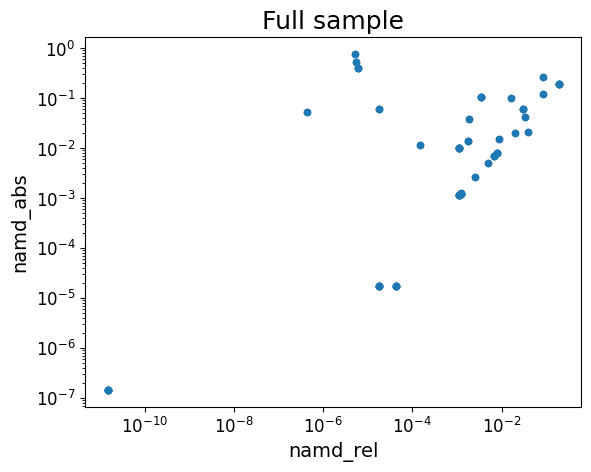

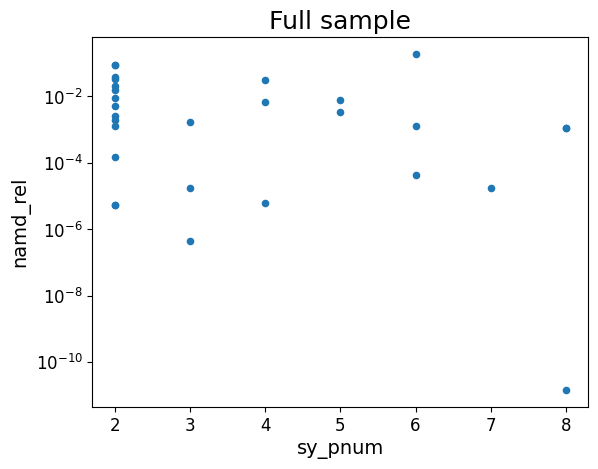

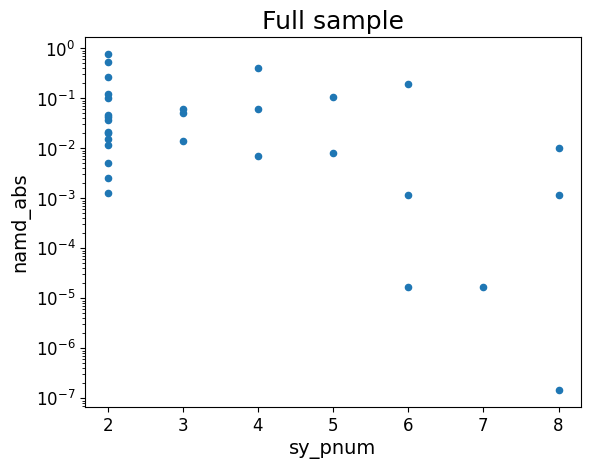

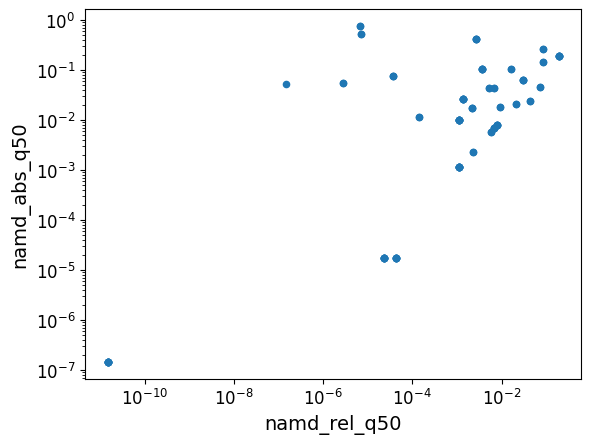

In [18]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    # which=["rel"],
    # which=["abs"],
    which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e5),
)

2025-08-14 20:55:51.167 | INFO     | __main__:<module>:11 - Selecting the host: Kepler-462l
2025-08-14 20:55:51.172 | INFO     | __main__:<module>:13 - Host selected
2025-08-14 20:55:51.174 | INFO     | __main__:<module>:15 - Computing the Monte Carlo relative NAMD
2025-08-14 20:55:51.291 | INFO     | __main__:<module>:24 - Values computed
2025-08-14 20:55:51.293 | INFO     | __main__:<module>:27 - Plotting the relative NAMD distribution


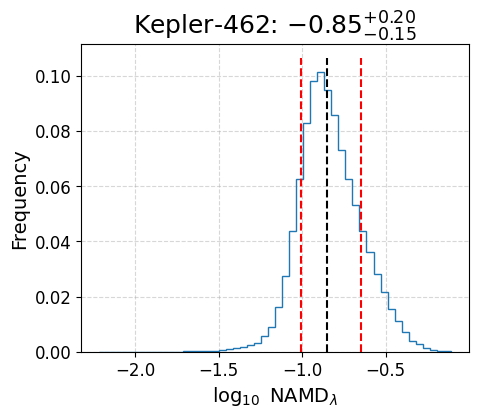

2025-08-14 20:55:51.574 | INFO     | __main__:<module>:39 - Plot done


In [26]:
# Task 1: sample the NAMD for a given host
# hostname = "K2-290"
# hostname = "K2-290l"
# hostname = "Kepler-462"
hostname = "Kepler-462l"
kind = "abs"
# kind = "rel"
Npt = int(1e5)
threshold = 100

logger.info(f"Selecting the host: {hostname}")
host = df_namd[df_namd["hostname"] == hostname]
logger.info("Host selected")

logger.info("Computing the Monte Carlo relative NAMD")
retval = solve_namd_mc(
    host=host,
    kind=f"{kind}",
    Npt=Npt,
    threshold=threshold,
    full=True,
    use_trunc_normal=True,
)
logger.info("Values computed")

# Task 2: plot the NAMD for a given host
logger.info("Plotting the relative NAMD distribution")
simple_plot(
    df=retval,
    kind=f"{kind}",
    # title=hostname,
    title=hostname[:-1],
    which="namd",
    scale="log",
    xlabel=rf"NAMD$_\lambda$",
    outpath="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/Kepler-462_lambda_paper.pdf",
    figsize=(5, 4),
)
logger.info("Plot done")